In [ ]:
import pandas as pd
import uuid
import random
import datetime
import numpy as np


num_rows=200
features=["uid",
          "name",
          "gender",
          "class",
          "marks",
          "absenty"]

df=pd.DataFrame(columns=features)

In [ ]:
!pip install Faker

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 25.4 MB/s eta 0:00:00


In [ ]:
from faker import Faker
df["uid"]=[uuid.uuid4().hex for i in range (num_rows)]


genders=["male","female",None]
df["gender"]=random.choices(genders,weights=(47,47,3),k=num_rows)

df["class"]=[random.randint(1,10) for  i in range(num_rows)]

df["marks"]=[random.randint(1,100) for  i in range(num_rows)]

df["absenty"]=[random.randint(1,50) for  i in range(num_rows)]


faker = Faker()
def name_gen(gender):
    """
    Quickly generates a name based on gender
    """
    if gender=='male':
        return faker.name_male()
    elif gender=='female':
        return faker.name_female()
  
    
    return faker.name()
# Generating names for each user
df['name'] = [name_gen(i) for i in df['gender']]

In [ ]:
print(df)

                                  uid             name  gender  class  marks  \
0    13897582501a422fa986b5b9f31114de      Steven Rose    male      3     99   
1    f5726176459e4207ace182b839b7fbeb     Anne Shields  female      8     18   
2    d88ad641ac8841f9b3c0cb589fd78309  Vanessa Maxwell  female     10     95   
3    f9c8515375cb4594b795647bc0dda768     Donald Joyce    male      1     82   
4    afdde4e1fa8d47e6bc60a315e6d6e61c    Rebecca Young  female      8     87   
..                                ...              ...     ...    ...    ...   
195  a70e51ddb345402cb661567582e49516   Curtis Gardner    male      3     63   
196  41a306f398d84fd28e15bfa51fef87dd   Christina Sosa  female      1     56   
197  5bdb7f2f380a463eb6a6282bacecd942    Amanda Thomas  female      9     46   
198  85d407c89bbe49a0b35542b9e59da22e      Janet Clark  female      4      6   
199  7b9d660d85104a9987b30438a0aacc75    Jordan Taylor    male      9      8   

     absenty  
0         15  
1        

In [ ]:
print((df["uid"].nunique()))


df.info()

num_of_duplicated_data = df.duplicated().sum()
print(num_of_duplicated_data)
df = df.drop_duplicates()

200
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   uid      200 non-null    object
 1   name     200 non-null    object
 2   gender   195 non-null    object
 3   class    200 non-null    int64 
 4   marks    200 non-null    int64 
 5   absenty  200 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 9.5+ KB
0


In [ ]:
print(df["gender"].isnull().sum())
df["gender"].fillna("female",inplace=True)
print(df)

5
                                  uid             name  gender  class  marks  \
0    13897582501a422fa986b5b9f31114de      Steven Rose    male      3     99   
1    f5726176459e4207ace182b839b7fbeb     Anne Shields  female      8     18   
2    d88ad641ac8841f9b3c0cb589fd78309  Vanessa Maxwell  female     10     95   
3    f9c8515375cb4594b795647bc0dda768     Donald Joyce    male      1     82   
4    afdde4e1fa8d47e6bc60a315e6d6e61c    Rebecca Young  female      8     87   
..                                ...              ...     ...    ...    ...   
195  a70e51ddb345402cb661567582e49516   Curtis Gardner    male      3     63   
196  41a306f398d84fd28e15bfa51fef87dd   Christina Sosa  female      1     56   
197  5bdb7f2f380a463eb6a6282bacecd942    Amanda Thomas  female      9     46   
198  85d407c89bbe49a0b35542b9e59da22e      Janet Clark  female      4      6   
199  7b9d660d85104a9987b30438a0aacc75    Jordan Taylor    male      9      8   

     absenty  
0         15  
1      

In [ ]:

a1=df["marks"].mean()
print(a1)
a = np.array(df['marks'].values.tolist())
print (a)


df['marks'] = np.where(a < 9, df["marks"].median(), a).tolist()
print (df)

53.245
[ 99  18  95  82  87  98  21  44  51 100  75  14  97  99  46   4  91  66
  42  98  58  13  55  57  81  81  99  47  74  27  41   6  71  38  55  78
  26  14  14  83  59   7  25  66  42  15  64  31  72  84  41   7  66  75
  78  86  65  74  29  93  67  87  88  78  72  81  18  95   6  19  86   5
  32  80  30  98  19  19  88  86  41  14  22  22  82  51  41  32  99  52
  21  34  27  71  10  37  47  85  99  41  22  62  10  42  31  99  83  31
  24  39  91  45  54  18  69  95   3  74 100  49  19  40  27  85  78  66
  97  91  97  34  80  89  35  49  99  65  45  14  20  14  39  79  94  95
  13  41  10  76  33  76  69  41  41  49  39  16  81  11  25  68  87   7
  50  55  65  88  22  72  81  33  79   8  32  94  10  63  70  81  43  75
  73  56   9  28  13  88  98  44  21  34  48  50   8  87  11  63  56  46
   6   8]
                                  uid             name  gender  class  marks  \
0    13897582501a422fa986b5b9f31114de      Steven Rose    male      3   99.0   
1    f5726176459e420

In [ ]:
import matplotlib.pyplot as plt


matplotlib.pyplot.scatter(x_axis_data, y_axis_data, s=None, c=None, marker=None, cmap=None, vmin=None, vmax=None, alpha=None, linewidths=None, edgecolors=None) 
 

x_axis_data- An array containing x-axis data
y_axis_data- An array containing y-axis data
s- marker size (can be scalar or array of size equal to size of x or y)
c- color of sequence of colors for markers
marker- marker style
cmap- cmap name
linewidths- width of marker border
edgecolor- marker border color
alpha- blending value, between 0 (transparent) and 1 (opaque):\

---



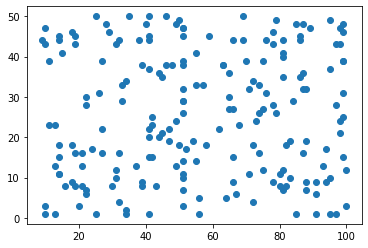

In [ ]:
plt.scatter(df["marks"],df["absenty"])

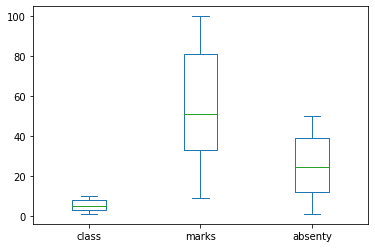

In [ ]:
df.plot.box()

Text(0, 0.5, 'absenty')

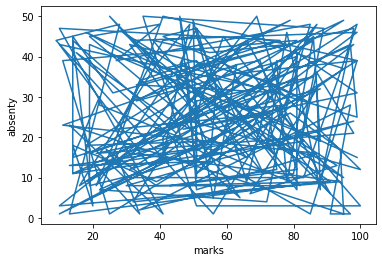

In [ ]:
plt.plot(df["marks"],df["absenty"])
plt.xlabel("marks")
plt.ylabel("absenty")

In [ ]:
from sklearn import preprocessing
import numpy as np

import math
x_array = np.array(df['marks'])
print("marks array: ",x_array)

normalized_arr = preprocessing.normalize([x_array])
print("Normalized marks array: ",normalized_arr)


print(type(normalized_arr))
normalized_arr.shape






marks array:  [ 99.  18.  95.  82.  87.  98.  21.  44.  51. 100.  75.  14.  97.  99.
  46.  51.  91.  66.  42.  98.  58.  13.  55.  57.  81.  81.  99.  47.
  74.  27.  41.  51.  71.  38.  55.  78.  26.  14.  14.  83.  59.  51.
  25.  66.  42.  15.  64.  31.  72.  84.  41.  51.  66.  75.  78.  86.
  65.  74.  29.  93.  67.  87.  88.  78.  72.  81.  18.  95.  51.  19.
  86.  51.  32.  80.  30.  98.  19.  19.  88.  86.  41.  14.  22.  22.
  82.  51.  41.  32.  99.  52.  21.  34.  27.  71.  10.  37.  47.  85.
  99.  41.  22.  62.  10.  42.  31.  99.  83.  31.  24.  39.  91.  45.
  54.  18.  69.  95.  51.  74. 100.  49.  19.  40.  27.  85.  78.  66.
  97.  91.  97.  34.  80.  89.  35.  49.  99.  65.  45.  14.  20.  14.
  39.  79.  94.  95.  13.  41.  10.  76.  33.  76.  69.  41.  41.  49.
  39.  16.  81.  11.  25.  68.  87.  51.  50.  55.  65.  88.  22.  72.
  81.  33.  79.  51.  32.  94.  10.  63.  70.  81.  43.  75.  73.  56.
   9.  28.  13.  88.  98.  44.  21.  34.  48.  50.  51.  87.  1

(1, 200)

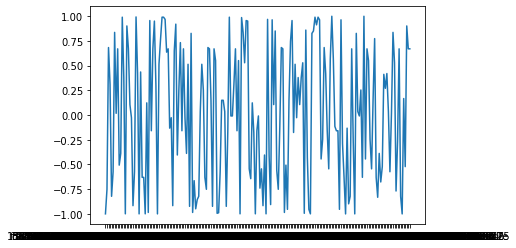

In [ ]:
import math
f=lambda x:math.sin(x)
l=list(map(f,df["marks"]))
plt.plot(df['uid'],l)

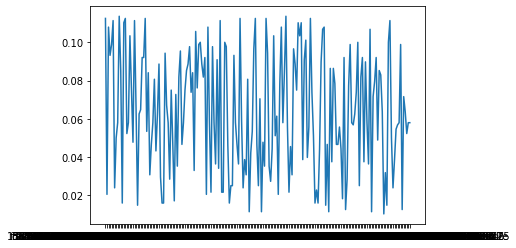

In [ ]:

plt.plot(df['uid'],normalized_arr.flatten())

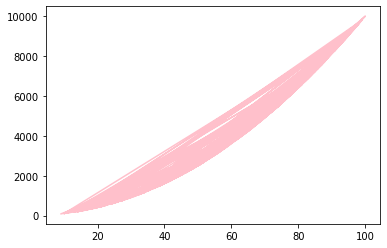

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot(func):
    
    y = func(x)
    plt.plot(x, y, '-', color='pink')
    plt.show()
    plt.close()
  
x=df["marks"]

plot(lambda x: x ** 2)

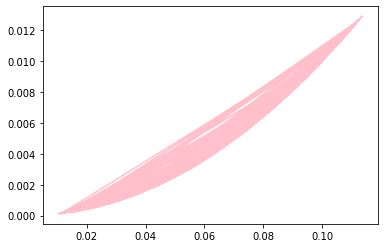

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def plot(func):
    # plt.figure(figsize=(12, 8))
    y = func(x)
    plt.plot(x, y, '-', color='pink')
    plt.show()
    plt.close()
x=normalized_arr.flatten()

plot(lambda x:  x ** 2)

In [ ]:
from scipy.stats import skew
print(skew(df['marks']))

-0.023488059252603905


Normally Distributed: In this, the skewness is always equated to zero.
Skewness=0

Positively skewed distribution: In this, A Positively-skewed distribution has a long right tail, that’s why this is also known as right-skewed distribution. the reason behind it, in this value of mode is highest and mean is least which leads to right peak.
Skessness >o

How to find skewness of data using Python
Negatively skewed distribution: In this, a negatively skewed distribution has a long left tail, that’s why this is also known as left-skewed distribution. the reason behind it, in this value of mode is least and mean is highest just reverse to right-skewed which leads to the left peak.
Skewness<0

Negatively skewed distribution
The formula to find skewness of data
Skewness =3(Mean- Median)/Standard Devia

In [ ]:
from scipy.stats import skew
print(skew(normalized_arr.flatten()))

-0.02348805925260391


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


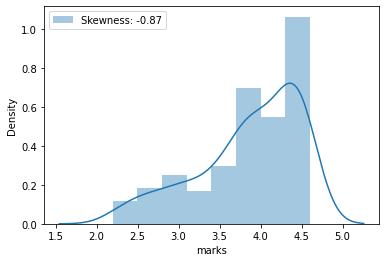

In [ ]:
import numpy as np
import seaborn as sns
Log_Fare = df["marks"].map(lambda i: np.log(i) if i > 0 else 0)
t=sns.distplot(Log_Fare,label="Skewness: %.2f"%(Log_Fare.skew()) )
t.legend()